# Applied Statistics Project

## 1. Import the necessary libraries

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 2. Read the data as a data frame

In [2]:
ins = pd.read_csv('insurance.csv')
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Perform basic EDA which should include the following and print out your insights at every step.
### a. Shape of the data

In [3]:
ins.shape #1338 rows and 7 columns

(1338, 7)

#### The dataset contains 1338 rows and 7 columns.

In [4]:
ins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


### b. Data type of each attribute

#### Data Type of each column

In [5]:
#data types of each column
ins.dtypes.to_frame(name = 'Data Type')

,Data Type
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


#### Converting 'sex', 'children', 'smoker' & 'region' columns into categorical variables

In [6]:
ins.sex = pd.Categorical(ins.sex)
ins.smoker = pd.Categorical(ins.smoker)
ins.region = pd.Categorical(ins.region)
ins.children = pd.Categorical(ins.children)
ins.dtypes.to_frame(name = 'Data Type')

,Data Type
age,int64
sex,category
bmi,float64
children,category
smoker,category
region,category
charges,float64


### c. Checking the presence of missing values

In [7]:
#to check null values - it can be seen that there are no mull values in the given dataset
print(ins.isnull().any())

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool


#### The dataset contains _NO_ null values

### d. 5 point summary of numerical attributes

In [8]:
ins.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

#### Distribution Plot of 'bmi' column

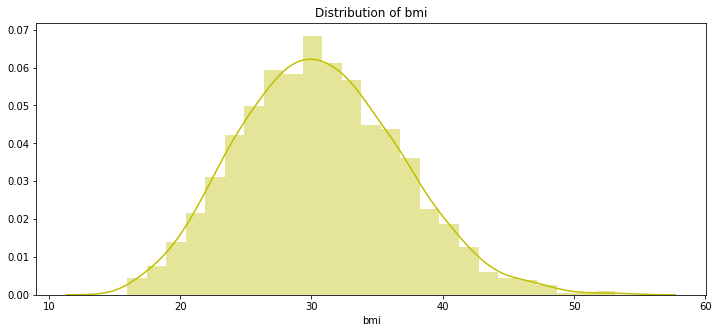

In [9]:
plt.figure(figsize = (12,5))
plt.title('Distribution of bmi')
sns.distplot(ins['bmi'], color = 'y')

#### Distribution Plot of 'age' column

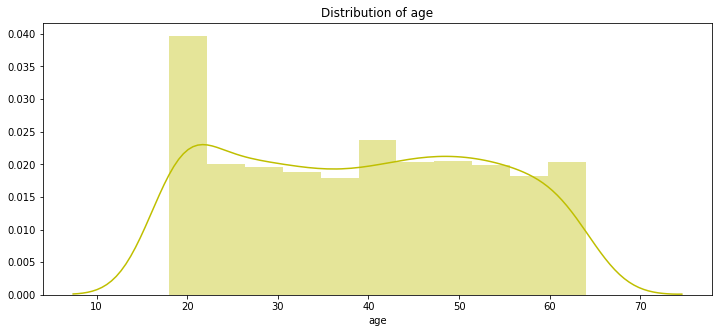

In [10]:
plt.figure(figsize=(12,5))
plt.title('Distribution of age')
sns.distplot(ins['age'], color = 'y')

#### Distribution Plot of 'charges' column

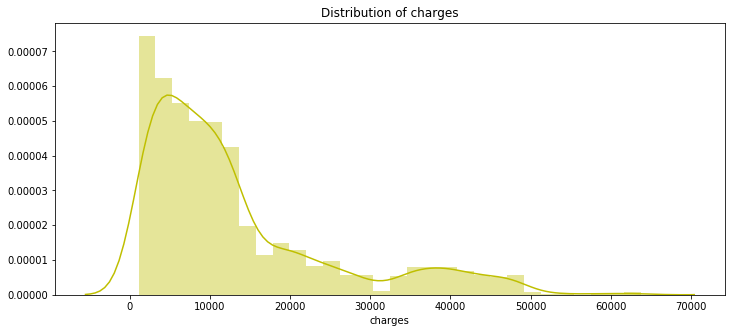

In [11]:
plt.figure(figsize = (12,5))
plt.title('Distribution of charges')
sns.distplot(ins['charges'], color = 'y')

##### Correlation between age, bmi, and charges columns

In [12]:
ins.corr()['charges'].sort_values().to_frame(name = 'Correlation factor of charges with bmi and age')
#it can be seen that the 'charges' have a high correlation with 'age' followed by 'bmi'

,Correlation factor of charges with bmi and age
bmi,0.198341
age,0.299008
charges,1.000000


In [13]:
ins_encoded = ins.copy(deep = True)

#### The LabelEncoder has taken 0 for female and 1 for male in the 'sex' column while it has taken 1 for yes and 0 for no in the 'smoker' column

In [14]:
from sklearn.preprocessing import LabelEncoder

number = LabelEncoder()
ins_encoded['smoker'] = number.fit_transform(ins_encoded['smoker']).astype(int)
ins_encoded['sex'] = number.fit_transform(ins_encoded['sex']).astype(int)
ins_encoded.head()
#The LabelEncoder has taken 0 for female and 1 for male in the 'sex' column while it has taken 1 for yes and 0 for no in the 
#'smoker' column

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns - optional

#### Skewness of 'bmi' column

In [15]:
bmi = ins.bmi
print(bmi.skew())

0.2840471105987448


#### Skewness of 'age' column

In [16]:
age = ins.age
print(age.skew())

0.05567251565299186


#### Skewness of 'charges' column

In [17]:
charges = ins.charges
print(charges.skew())

1.5158796580240388


### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns - optional

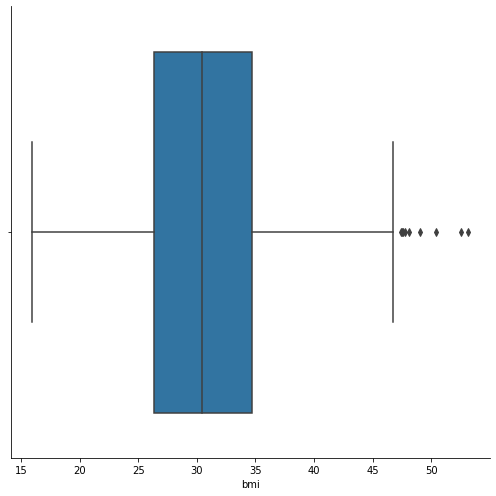

In [18]:
sns.catplot(x = 'bmi', data = ins, height = 7, kind = 'box')

#### As can be seen from the above boxplot, outliers are present in the bmi column

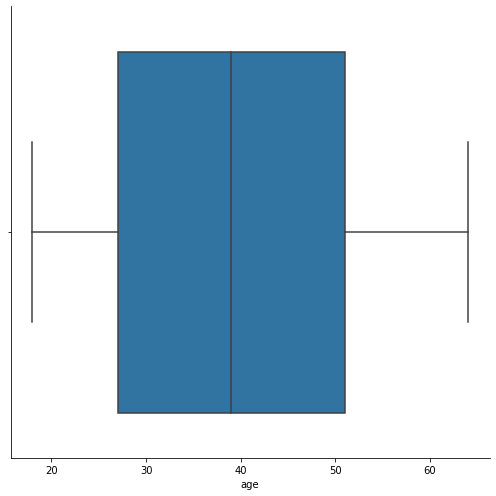

In [19]:
sns.catplot(x = 'age', data = ins, height = 7, kind = 'box')

#### As can be seen from the above boxplot, outliers are not present in the age column

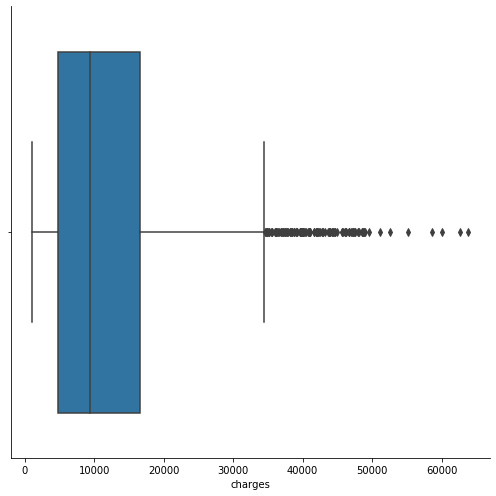

In [20]:
sns.catplot(x = 'charges', data = ins, height = 7, kind = 'box')

#### As can be seen from the above boxplot, outliers are present in the charges column

### h. Distribution of categorical columns (including children)

#### Distribution of 'sex' column

In [21]:
gender = ins['sex'].value_counts().to_frame(name = 'Total')
gender

,Total
male,676
female,662


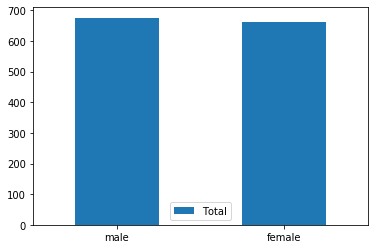

In [22]:
gender.plot(kind = 'bar', rot = 0)

#### Distribution of 'children' column

In [23]:
children = ins['children'].value_counts().to_frame(name = 'Number of Children')
children

,Number of Children
0,574
1,324
2,240
3,157
4,25
5,18


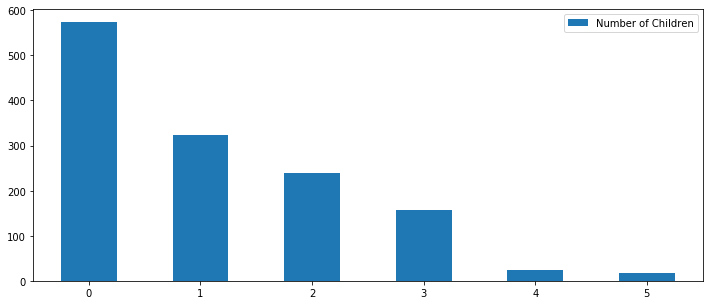

In [24]:
children.plot(kind = 'bar', figsize = (12,5), rot = 0)

#### Distribution of 'smoker' column

In [25]:
smoker_count = ins['smoker'].value_counts().to_frame(name = 'Total number of smokers')
smoker_count

,Total number of smokers
no,1064
yes,274


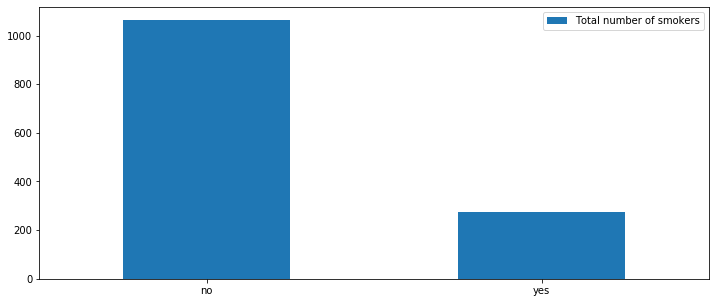

In [26]:
smoker_count.plot(kind = 'bar', figsize = (12,5), rot = 0)

#### Distribution of 'region' column

In [27]:
region = ins['region'].value_counts().to_frame(name = 'Persons per region')
region

,Persons per region
southeast,364
southwest,325
northwest,325
northeast,324


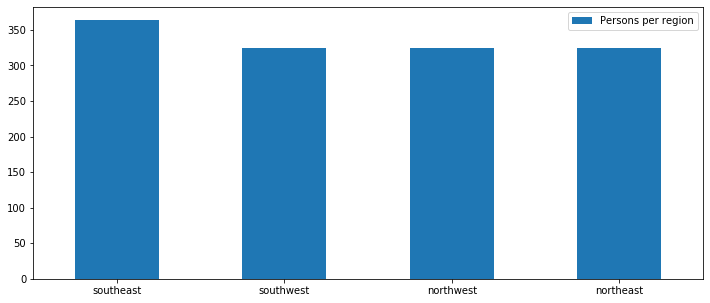

In [28]:
region.plot(kind = 'bar', figsize = (12,5), rot = 0)

#### Relation between region and charges. The boxplot shows that the southeast region pays the most for the insurance with an outlier crossing 60000

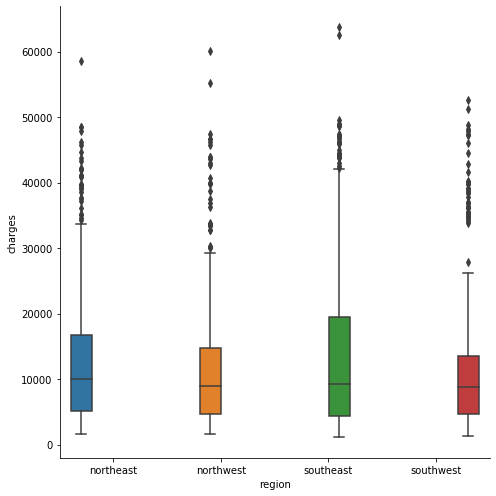

In [29]:
sns.catplot(x = 'region', y = 'charges', data = ins, hue = 'region', kind = 'box', height = 7)

### i. Pair plot that includes all the columns of the data frame

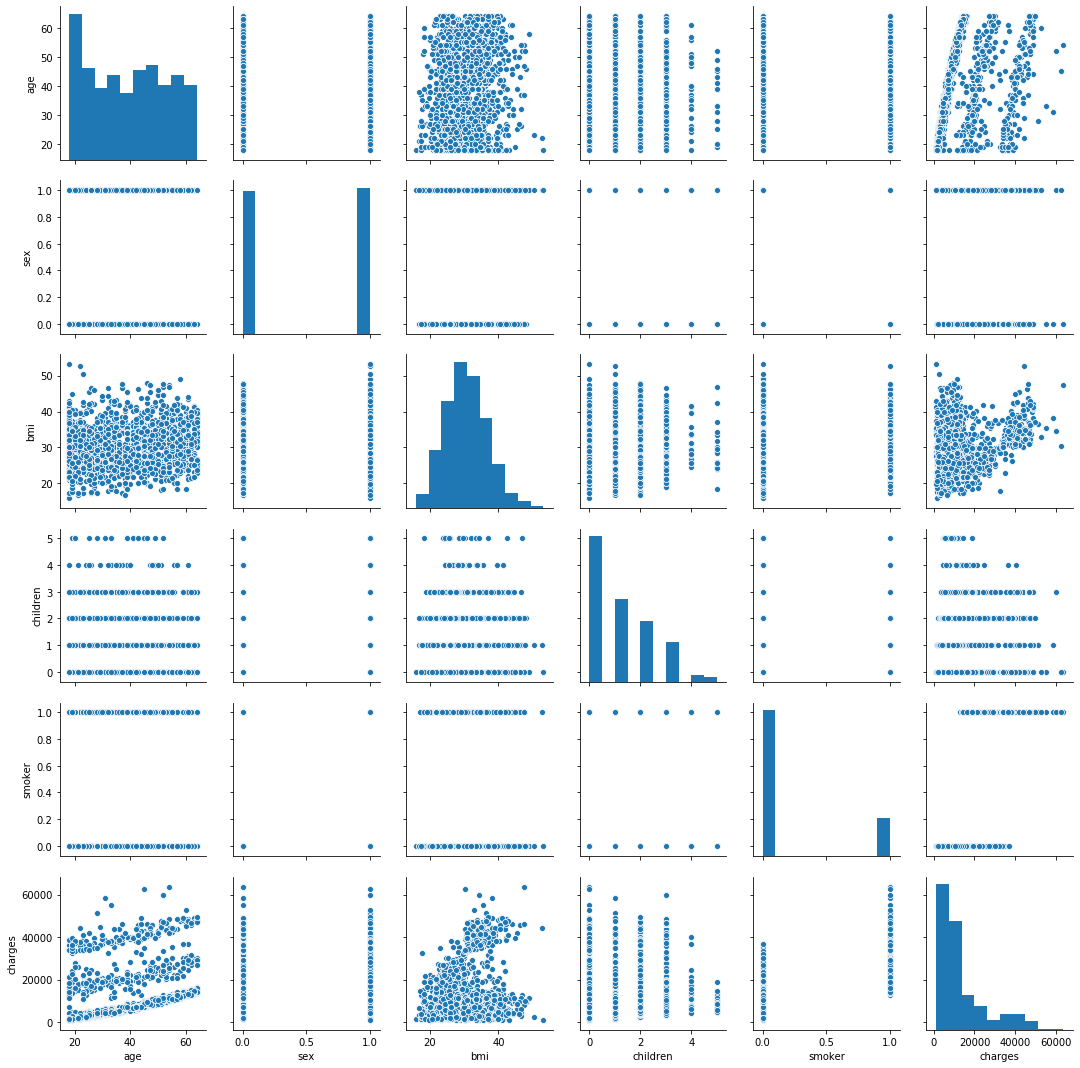

In [30]:
sns.pairplot(ins_encoded)

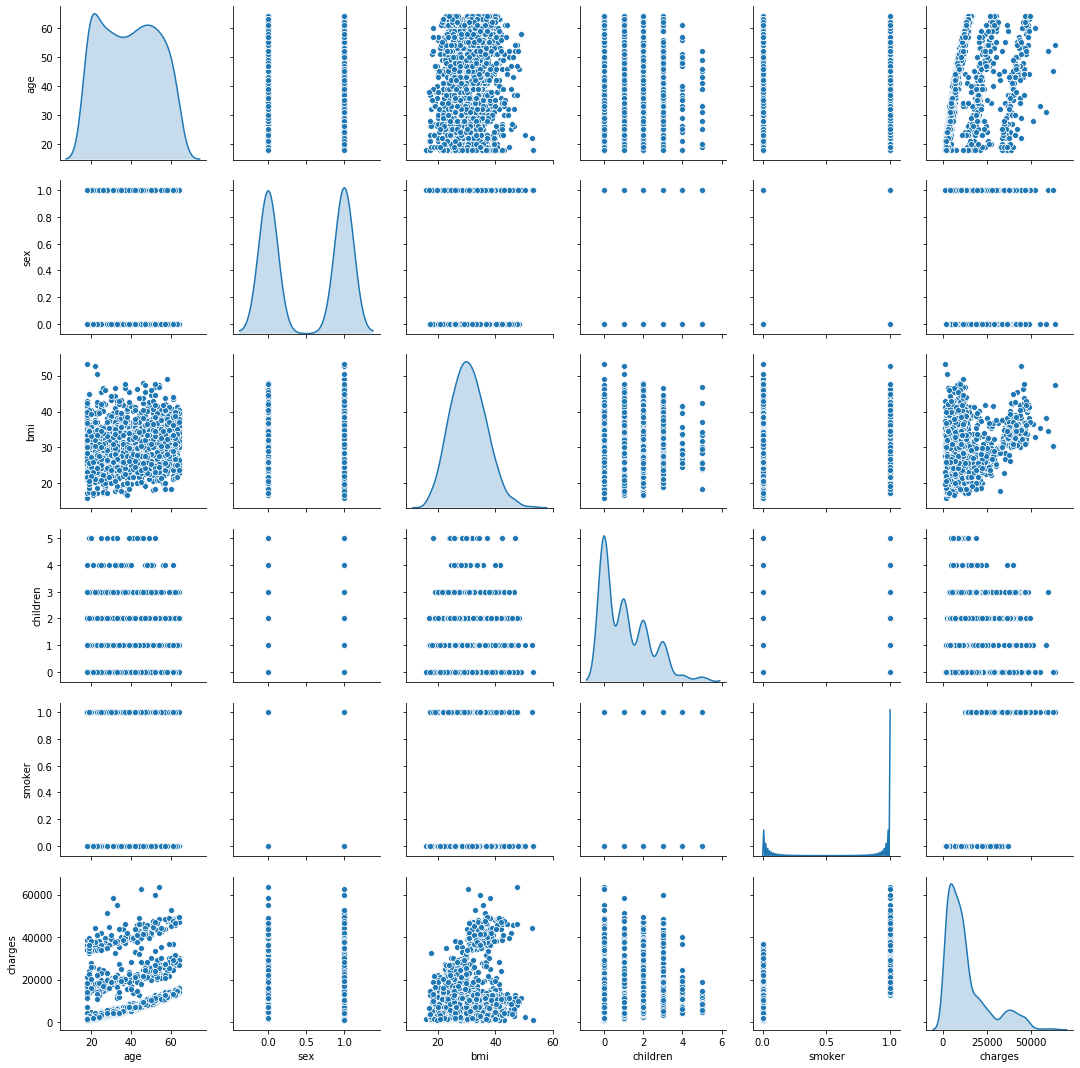

In [31]:
sns.pairplot(ins_encoded, diag_kind = 'kde')

## 4. Answer the following questions with statistical evidence

### a. Do charges of people who smoke differ significantly from the people who don't?

In [32]:
ins.groupby('smoker')['charges'].describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
no,1064.0,8434.268298,5993.781819,1121.8739,3986.438700,7345.40530,11362.887050,36910.60803
yes,274.0,32050.231832,11541.547176,12829.4551,20826.244213,34456.34845,41019.207275,63770.42801


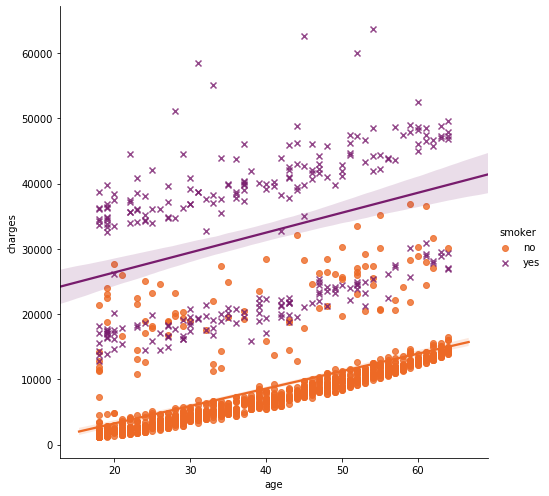

In [33]:
sns.lmplot(x = 'age', y = 'charges', hue = 'smoker', data = ins, markers = ["o", "x"], palette = 'inferno_r', height = 7)

#### It can be inferred from the above plot that the insurance charge increases with age. But for smokers the insurance charges is considerably higher when compared to non-smokers.

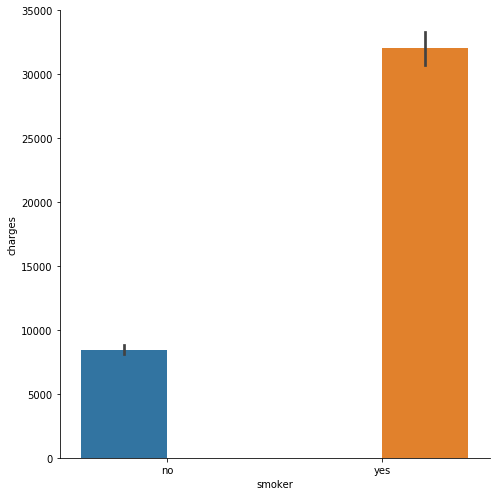

In [34]:
sns.catplot(x = 'smoker', y = 'charges', hue = 'smoker', data = ins, kind = 'bar', height = 7)

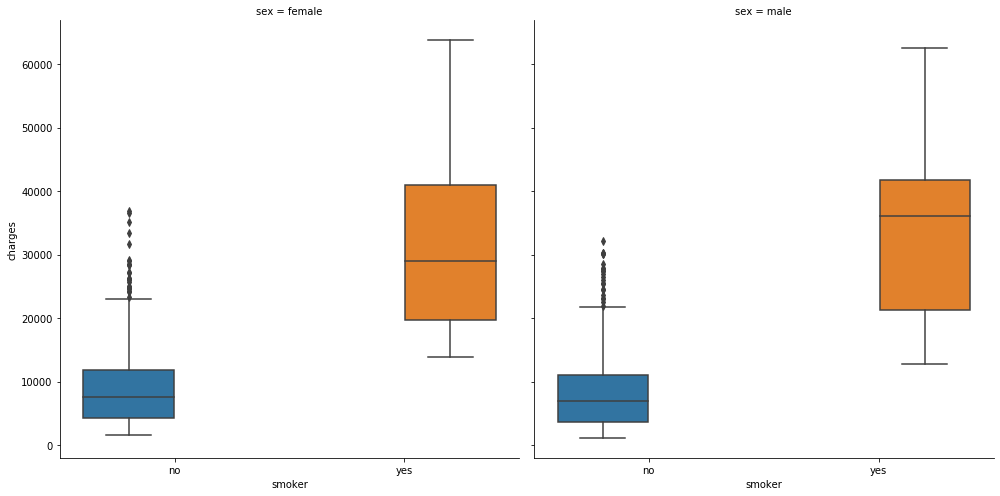

In [35]:
sns.catplot(x = 'smoker', y = 'charges', hue = 'smoker', col = 'sex', data = ins, kind = 'box', height = 7)
#it is evident from the following graph that the charges for smoker is considerably higher across both the genders

#### The above charts show that the insurance charges for people (for both males and females) who smoke is considerably higher than the people who don't smoke.

### Statistical Test
#### Null Hypothesis (H0) - The insurance charges are same irrespective of the smoking habit of a person
#### Alternate Hypothesis (H1) - The insurance charges differ significantly for smokers

In [36]:
from scipy.stats import ttest_ind

t_stats, p_value = ttest_ind(ins_encoded['charges'] , ins_encoded['smoker'])
print('T-statistic: ', '%1.2f' % t_stats, '\n\nP value: ',  '%1.2f' % p_value)

print('\nResult of Statistical Test:')

if p_value > 0.05:
    print('Null Hypothesis (H0) accepted - The insurance charges are same irrespective of the smoking habit of a person')
else:
    print('Null Hypothesis (H0) rejected (Alternate Hypothesis (H1) accepted) - The insurance charges differ significantly for smokers')

T-statistic:  40.08 

P value:  0.00

Result of Statistical Test:
Null Hypothesis (H0) rejected (Alternate Hypothesis (H1) accepted) - The insurance charges differ significantly for smokers


### b. Does bmi of males differ significantly from that of females?

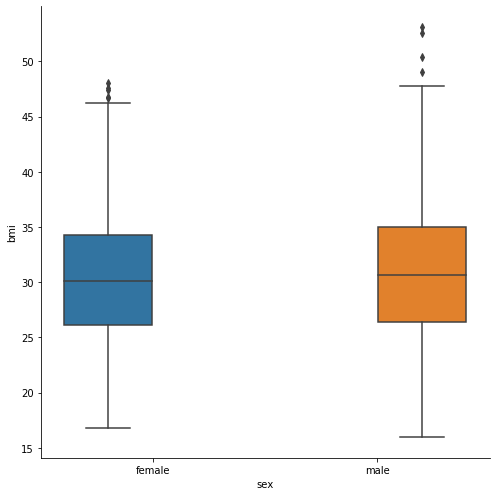

In [37]:
sns.catplot(x = 'sex', y = 'bmi', hue = 'sex', data = ins, kind = 'box', height = 7)
#the bmi of males is on the higher side when compared to females

#### The BMI of males is higher to that of females albeit not significantly.

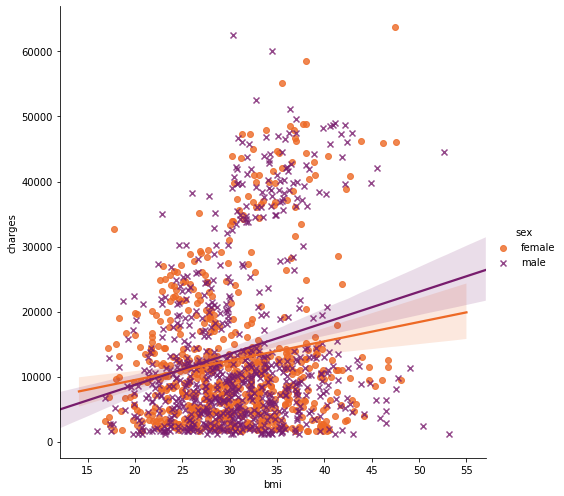

In [38]:
sns.lmplot(x = 'bmi', y = 'charges', hue = 'sex', data = ins, markers = ["o", "x"], palette = 'inferno_r', height = 7)

#### The above graph shows presence of outliers. Also, since the slope of male is steeper to that of female, the relationship shows that as the bmi increases the charges for insurance is greater for males as compared to females.

### Statistical Test

#### Null Hupothesis (H0) - The BMI doesn't depend on the gender
#### Alternate Hypothesis (H1) - The BMI varies across gender

In [39]:
t_stats, p_value = ttest_ind(ins_encoded['bmi'] , ins_encoded['sex'])
print('T-statistic: ', '%1.2f' % t_stats, '\n\nP value: ', '%1.2f' %  p_value)

print('\nResult of Statistical Test:')

if p_value > 0.05:
    print('Null Hypothesis (H0) accepted - The BMI does not depend on the gender')
else:
    print('Null Hypothesis (H0) rejected (Alternate Hypothesis (H1) accepted) - The BMI varies across gender')

T-statistic:  180.29 

P value:  0.00

Result of Statistical Test:
Null Hypothesis (H0) rejected (Alternate Hypothesis (H1) accepted) - The BMI varies across gender


### c. Is the proportion of smokers significantly different in different genders?

In [40]:
smoker = ins['smoker'].groupby(ins['sex']).value_counts().to_frame(name = 'Number of Smokers')
smoker

Number of Smokers
sex    smoker                   
female no                    547
       yes                   115
male   no                    517
       yes                   159

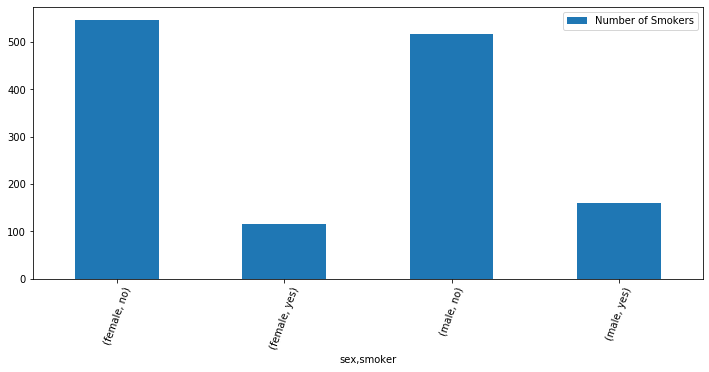

In [41]:
smoker.plot(kind = 'bar', figsize = (12,5), rot = 70)

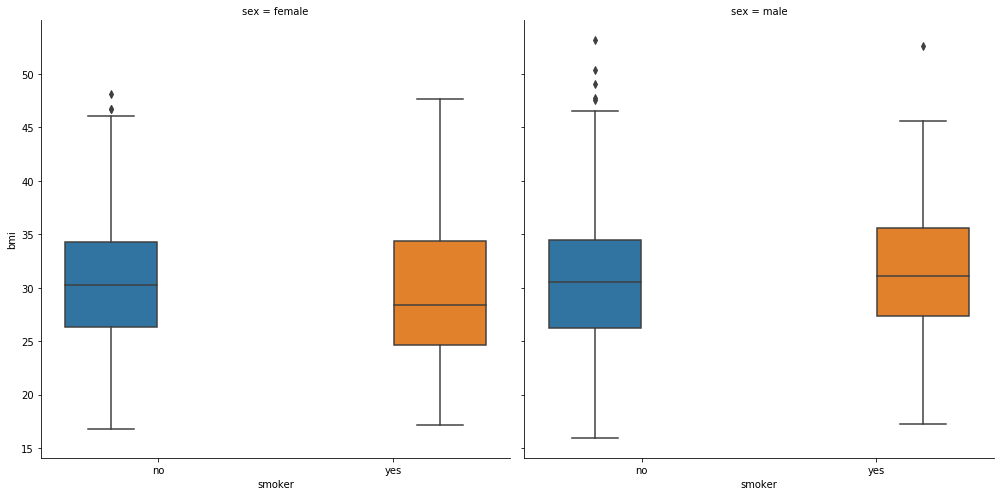

In [42]:
sns.catplot(x = 'smoker', y = 'bmi', hue = 'smoker', col = 'sex', data = ins, kind = 'box', height = 7)

#### Out of 676 males- 159 smoke and out of 662 females - 115 smoke
#### -Male smokers = 23.52% of total Males
#### -Female smokers = 17.37% of total Females
#### -There are _MORE_ male smokers when compared to the number of female smokers.

### Statistical Test

#### Null Hypothesis (H0) - Proportion of smokers across genders is similar
#### Alternate Hypothesis (H1) - Proportion of smokers varies across different gender

In [43]:
from scipy.stats import chi2_contingency

In [44]:
smoking_prop = pd.crosstab(ins['smoker'],ins['sex'])
smoking_prop

sex,female,male
smoker,,
no,547,517
yes,115,159


In [45]:
chi2_stats, p_value, dof, table = chi2_contingency(smoking_prop)
print('Chi2 Statistics: ', '%1.2f' % chi2_stats)
print('\nDegrees of Freedom: ', '%1.2f' % dof)
print('\nP-Value: ', '%1.2f' % p_value)
print('\nContingency Table: \n', table)

print('\nResult of Statistical Test:')

if p_value > 0.05:
    print('Null Hypothesis (H0) accepted - Proportion of smokers across genders is similar')
else:
    print('Null Hypothesis (H0) rejected (Alternate Hypothesis (H1) accepted) - Proportion of smokers varies across different gender')

Chi2 Statistics:  7.39

Degrees of Freedom:  1.00

P-Value:  0.01

Contingency Table: 
 [[526.43348281 537.56651719]
 [135.56651719 138.43348281]]

Result of Statistical Test:
Null Hypothesis (H0) rejected (Alternate Hypothesis (H1) accepted) - Proportion of smokers varies across different gender


### d. Is the distribution of bmi across women with no child, one child and two children, the same ?

In [46]:
female = ins[ins.loc[:, 'sex'] == 'female'] 

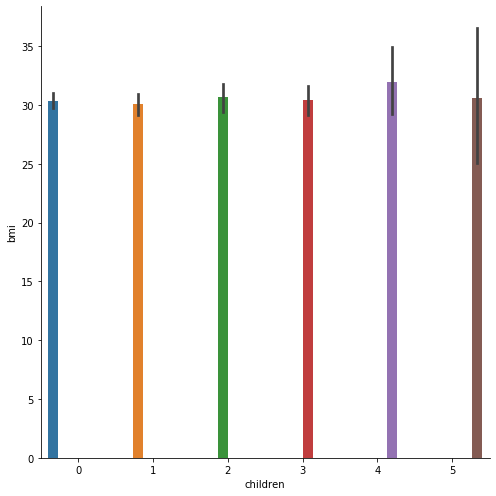

In [47]:
sns.catplot(x = 'children', y = 'bmi', data = female, hue = 'children', kind = 'bar', height = 7)

### Statistical Test

#### Null Hypothesis (H0) - The mean of BMI of women with no child, one child and two children is same
#### Alternate Hypothesis (H1) - The mean of BMI of women with no child, one child and two children is different

In [48]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd, MultiComparison
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [49]:
formula = 'bmi ~ C(children)'
model = ols(formula, ins).fit() 

C:\Users\Sahil\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


In [50]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.3493
Date:                Thu, 21 Nov 2019   Prob (F-statistic):              0.883
Time:                        00:02:50   Log-Likelihood:                -4316.3
No. Observations:                1338   AIC:                             8645.
Df Residuals:                    1332   BIC:                             8676.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           30.5503      0.255  

In [51]:
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
C(children),5.0,65.112017,13.022403,0.349327,0.882868
Residual,1332.0,49655.088370,37.278595,NaN,NaN


In [52]:
mc_table = MultiComparison(ins['bmi'], ins['children'])
result = mc_table.tukeyhsd()
print(result)
print(mc_table.groupsunique)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
     0      1   0.0729   0.9 -1.1379 1.2836  False
     0      2   0.4278   0.9 -0.9116 1.7672  False
     0      3    0.134   0.9 -1.4353 1.7034  False
     0      4   0.8409   0.9 -2.7191 4.4009  False
     0      5  -0.9453   0.9 -5.1162 3.2256  False
     1      2    0.355   0.9  -1.129 1.8389  False
     1      3   0.0612   0.9 -1.6332 1.7556  False
     1      4   0.7681   0.9 -2.8488 4.3849  False
     1      5  -1.0181   0.9 -5.2377 3.2014  False
     2      3  -0.2938   0.9 -2.0823 1.4948  False
     2      4   0.4131   0.9 -3.2488  4.075  False
     2      5  -1.3731   0.9 -5.6313 2.8851  False
     3      4   0.7069   0.9 -3.0452  4.459  False
     3      5  -1.0793   0.9 -5.4154 3.2567  False
     4      5  -1.7862   0.9 -7.1725 3.6001  False
--------------------------------------------------
[0 1 2 3 4 5]


#### As per the table above, we can statistically confirm that the Null Hypothesis (H0) is to be accepted, i.e., the mean of BMI of women with no child, one child and two children is same.